In [39]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as colors
import plotly.express as px

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("headsortails/us-natural-disaster-declarations")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 3.95M/3.95M [00:00<00:00, 16.9MB/s]

Extracting files...
Path to dataset files: /Users/niharpatel/.cache/kagglehub/datasets/headsortails/us-natural-disaster-declarations/versions/116


In [63]:
df1 = pd.read_csv("/Users/niharpatel/.cache/kagglehub/datasets/headsortails/us-natural-disaster-declarations/versions/116/us_disaster_declarations.csv")

In [64]:
df2 = pd.read_csv("/Users/niharpatel/.cache/kagglehub/datasets/headsortails/us-natural-disaster-declarations/versions/116/us_disasters_m5.csv")

In [65]:
len(df1)

64092

In [66]:
len(df2)

627

In [67]:
df1.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

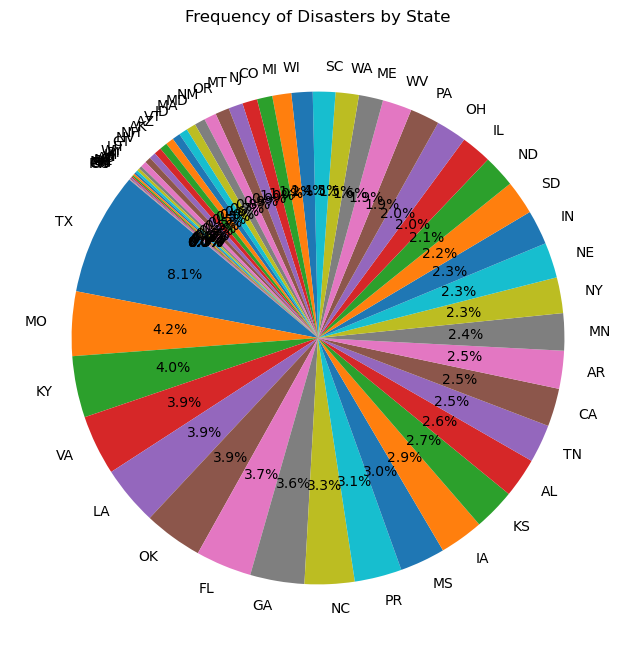

In [69]:
state_counts = df1['state'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Disasters by State')
plt.show()

In [70]:
state_counts = df1['state'].value_counts().reset_index()
state_counts.columns = ['state', 'disaster_count']

# Calculate the total disasters to get percentage
total_disasters = state_counts['disaster_count'].sum()
state_counts['percentage'] = (state_counts['disaster_count'] / total_disasters) * 100

# Categorize states into two groups based on the 2.5% threshold
state_counts['category'] = state_counts['percentage'].apply(lambda x: '> 2.5%' if x > 2.5 else '≤ 2.5%')

# Plotting with Plotly
fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode="USA-states",
    color='category',
    color_discrete_map={
        '> 2.5%': 'tomato',
        '≤ 2.5%': 'lightgrey'
    },
    scope="usa",
    title="States with Disaster Frequency > 2.5% in the United States"
)

# Show the plot
fig.show()

In [71]:
state_counts = df1['state'].value_counts().reset_index()
state_counts.columns = ['state', 'disaster_count']

# Calculate the total disasters to get percentage
total_disasters = state_counts['disaster_count'].sum()
state_counts['percentage'] = (state_counts['disaster_count'] / total_disasters) * 100

# Filter out states with a frequency of 0% (if any)
state_counts = state_counts[state_counts['percentage'] > 0]

# Plotting with Plotly
fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode="USA-states",
    color='percentage',
    hover_name='state',
    hover_data={'percentage': ':.2f'},
    color_continuous_scale="YlOrRd",
    scope="usa",
    title="Disaster Frequency Percentage by State in the United States"
)

# Update color scale and layout
fig.update_layout(coloraxis_colorbar=dict(
    title="Disaster Frequency (%)",
    tickformat=".1f"
))

# Show the plot
fig.show()

<AxesSubplot:title={'center':'Proportion of Declaration Types'}, ylabel='declaration_type'>

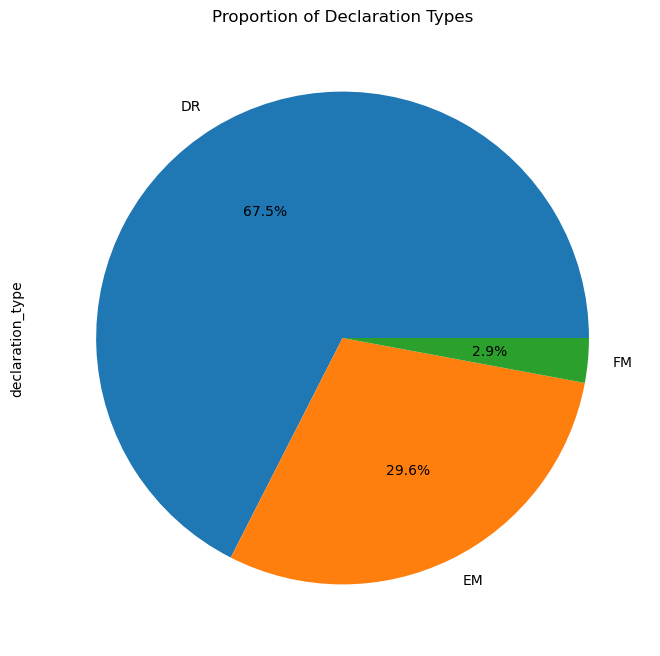

In [72]:
df1['declaration_type'].value_counts().plot.pie(
    autopct='%1.1f%%', figsize=(8, 8), title='Proportion of Declaration Types'
)

In [73]:
df1['declaration_date'] = pd.to_datetime(df1['declaration_date'], errors='coerce')

# Drop rows with invalid dates (if any)
df1 = df1.dropna(subset=['declaration_date'])

# Group by year and declaration type, then count occurrences
declaration_bubble = df1.groupby([df1['declaration_date'].dt.year, 'declaration_type']).size().reset_index(name='count')

# Plotting with Plotly
fig = px.scatter(
    declaration_bubble, 
    x='declaration_date', 
    y='declaration_type', 
    size='count', 
    color='declaration_type',
    title="Declarations by Year and Type",
    labels={'declaration_date': 'Year', 'count': 'Number of Declarations'}
)

# Show the plot
fig.show()

In [74]:
unique_titles = df1['declaration_title'].unique()
print(unique_titles)
unique_titles_df = pd.DataFrame(unique_titles, columns=['declaration_title'])
unique_titles_df.to_csv('unique_declaration_titles.csv', index=False)


['Tornado' 'Tornado & Heavy Rainfall' 'Flood' ...
 'Seminole Tribe Of Florida Tropical Storm Nicole' 'Hurricane Nicole'
 'Severe Winter Storm, Snowstorm, And Straight-Line Winds']


In [75]:
unique_titles = df1['incident_type'].unique()
print(unique_titles)


['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane'
 'Volcanic Eruption' 'Severe Storm' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snowstorm' 'Severe Ice Storm' 'Freezing'
 'Coastal Storm' 'Fishing Losses' 'Mud/Landslide' 'Human Cause'
 'Terrorist' 'Tsunami' 'Chemical' 'Biological' 'Tropical Storm'
 'Winter Storm']


/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2300254159.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



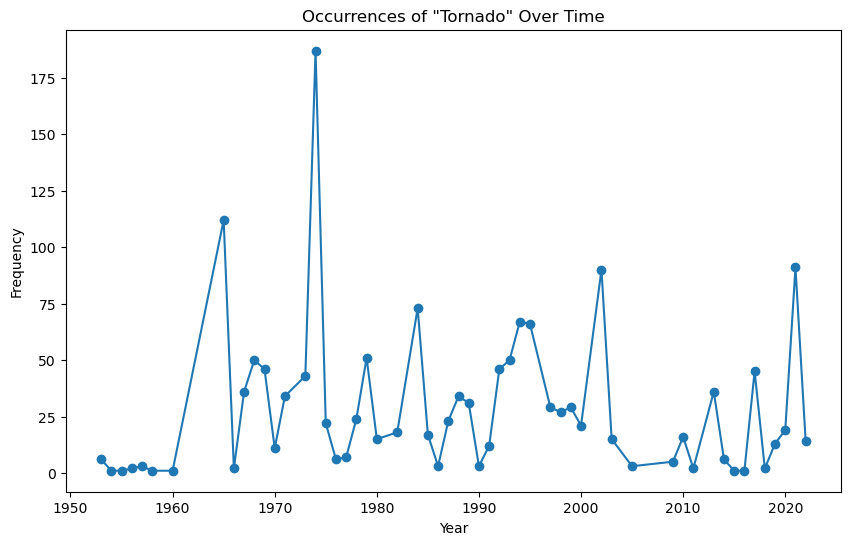

In [76]:
# Filter for a specific disaster title
specific_disaster = df1[df1['incident_type'] == 'Tornado']
specific_disaster['declaration_date'] = pd.to_datetime(specific_disaster['declaration_date'])
trend = specific_disaster.groupby(specific_disaster['declaration_date'].dt.year).size()

trend.plot(kind='line', marker='o', figsize=(10, 6), title='Occurrences of "Tornado" Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



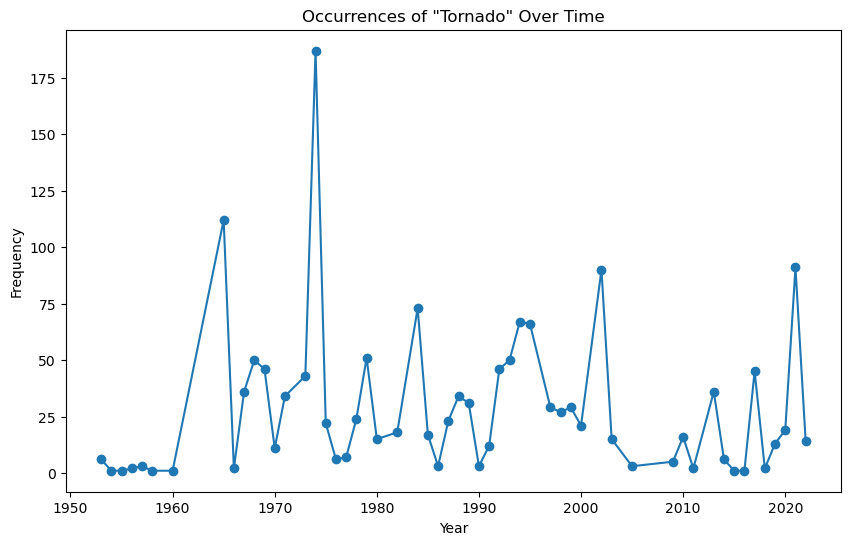

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



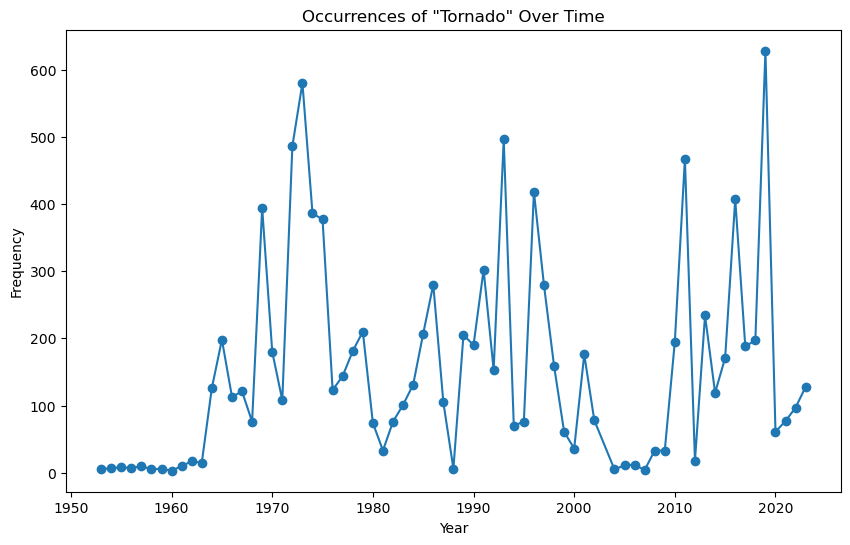

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



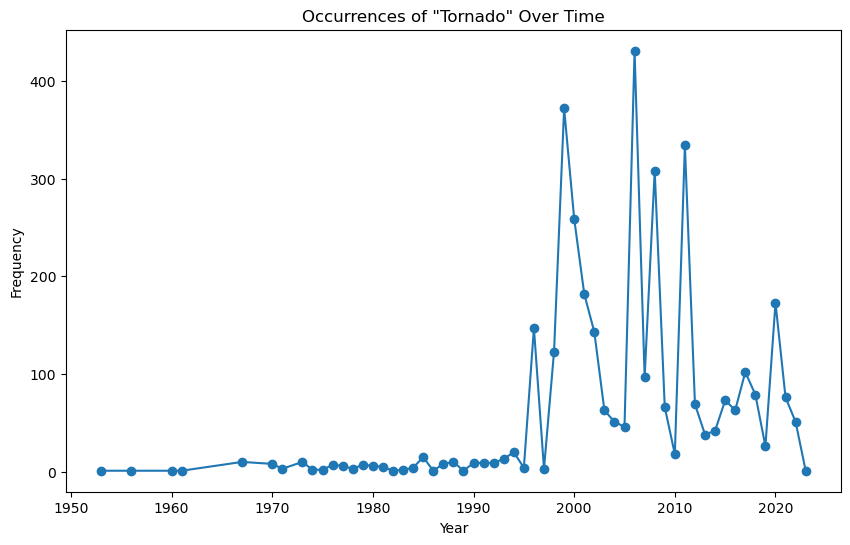

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



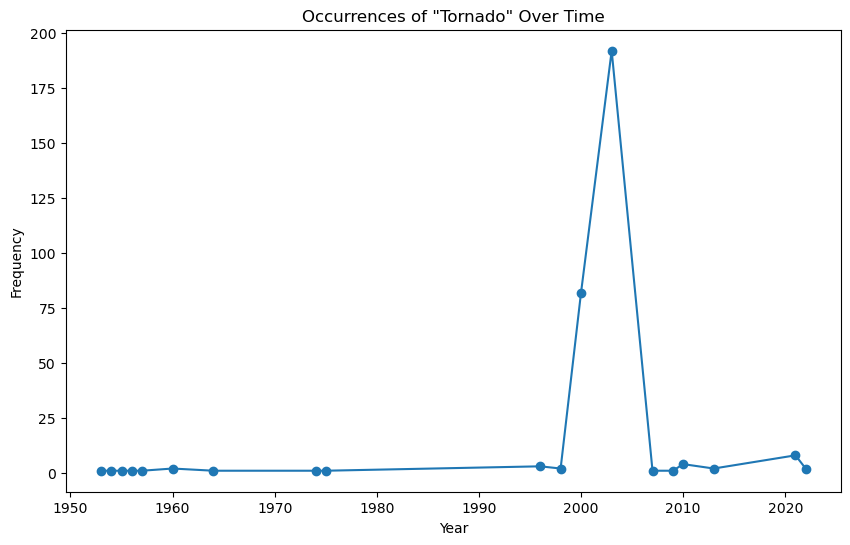

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



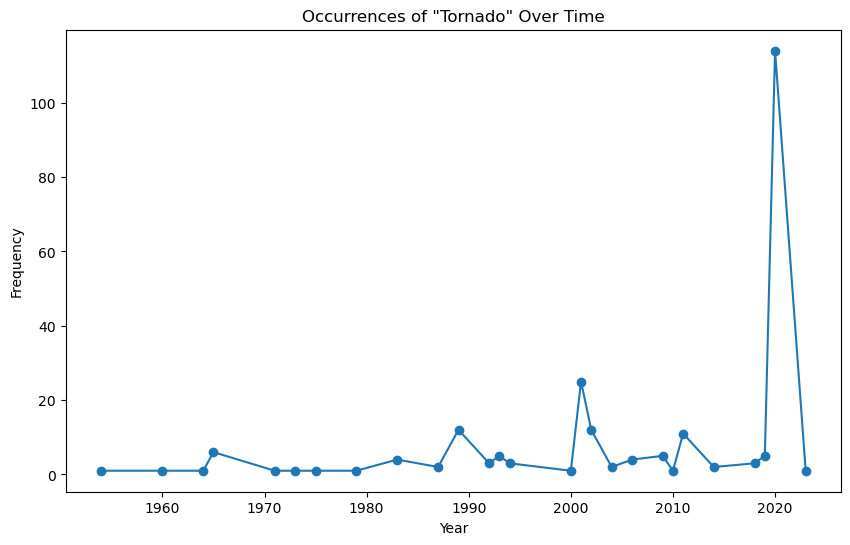

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



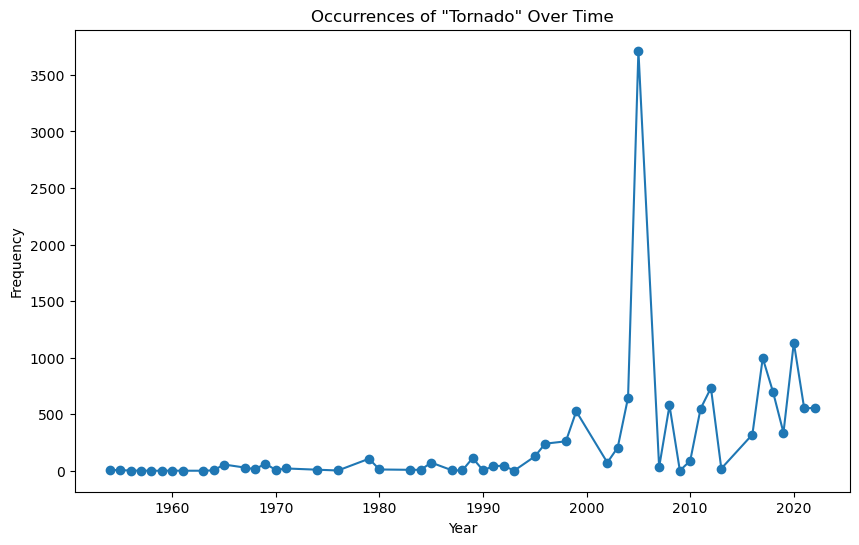

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



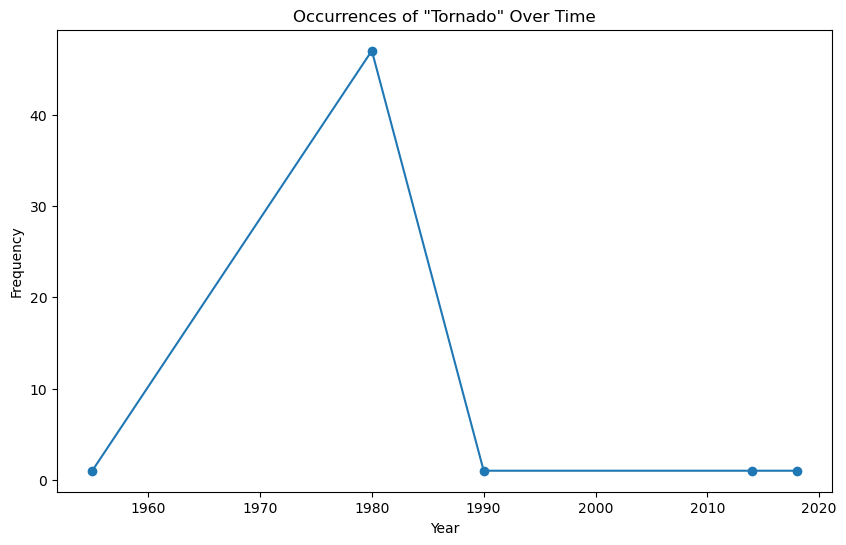

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



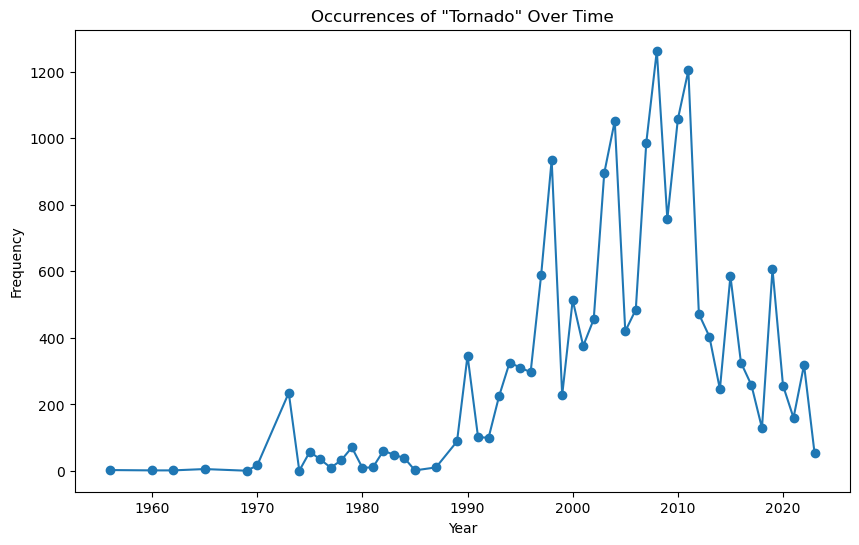

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



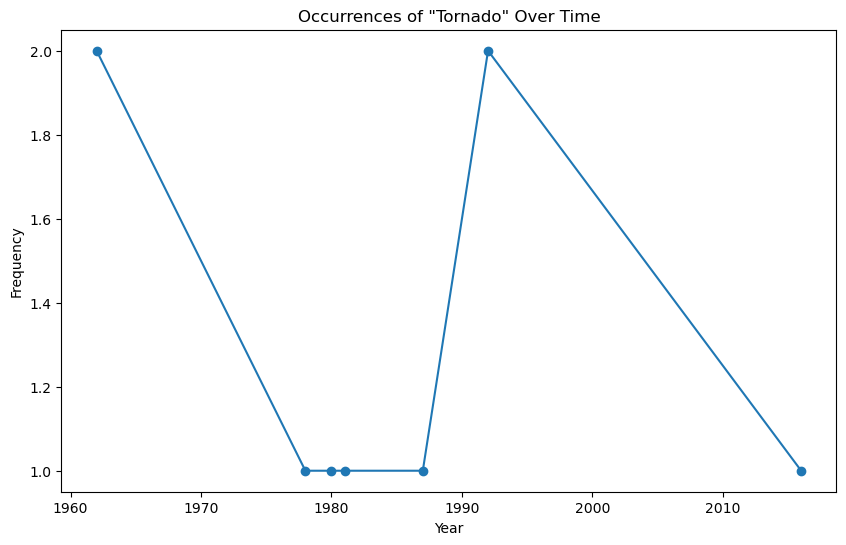

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



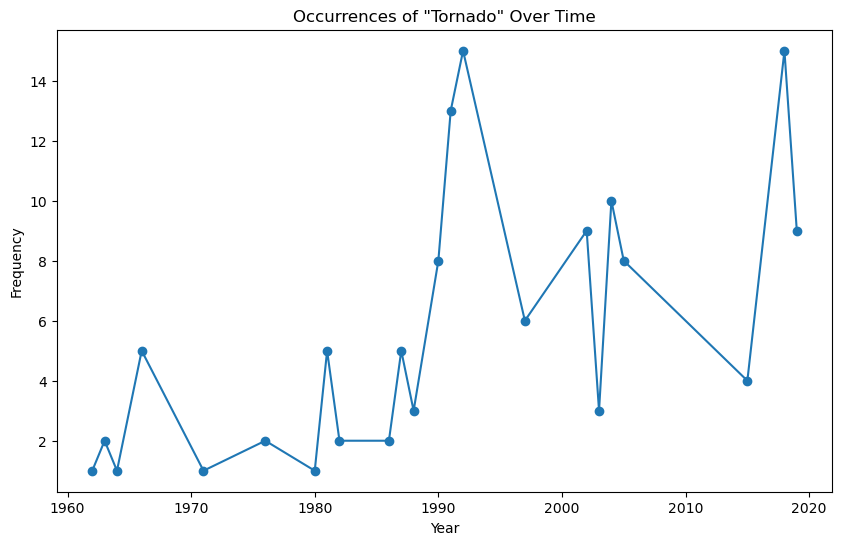

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



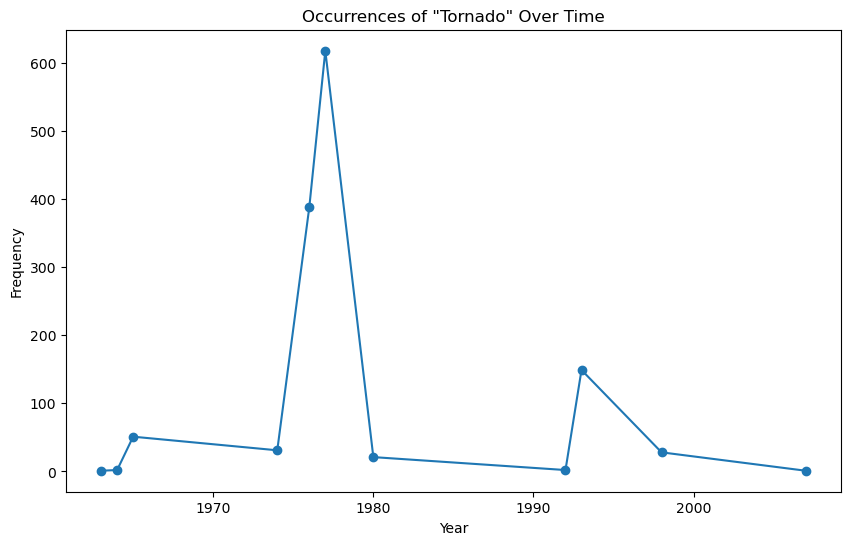

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



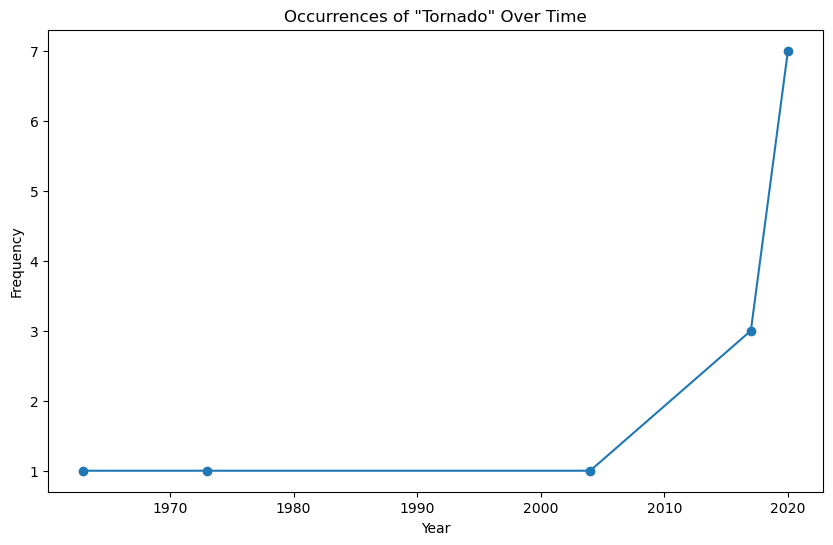

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



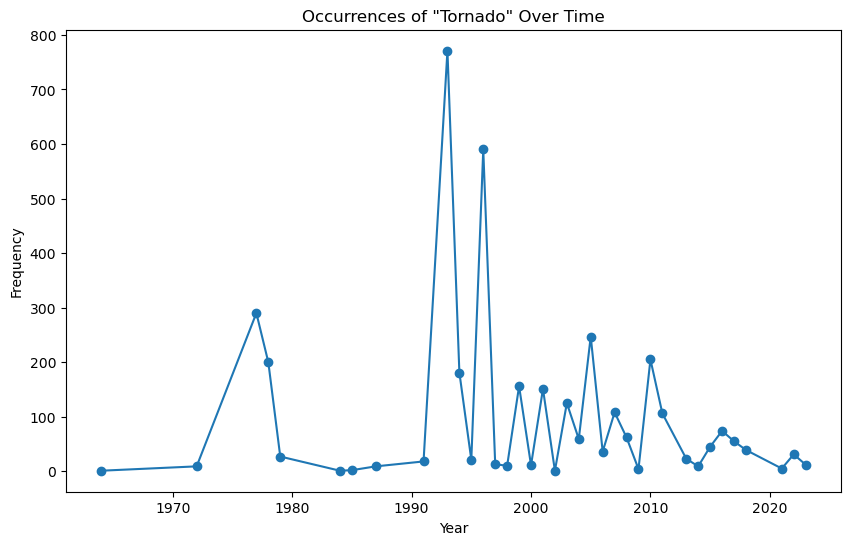

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



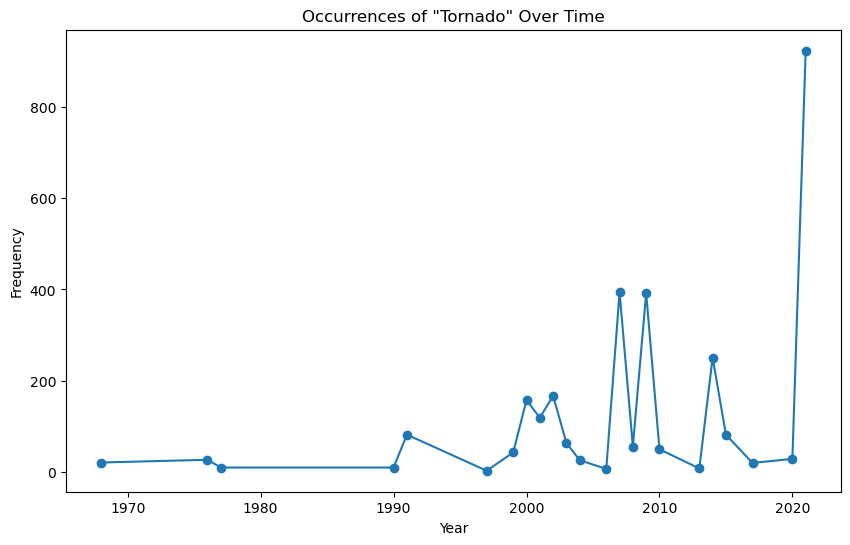

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



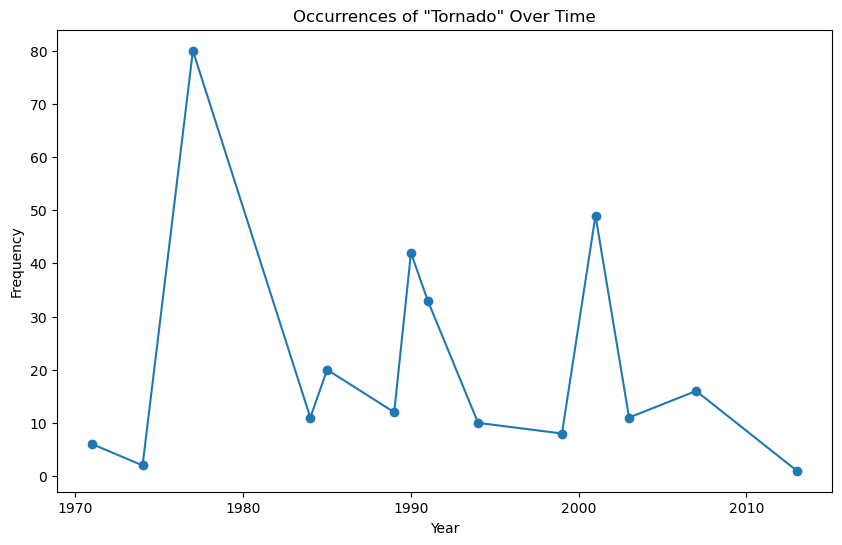

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



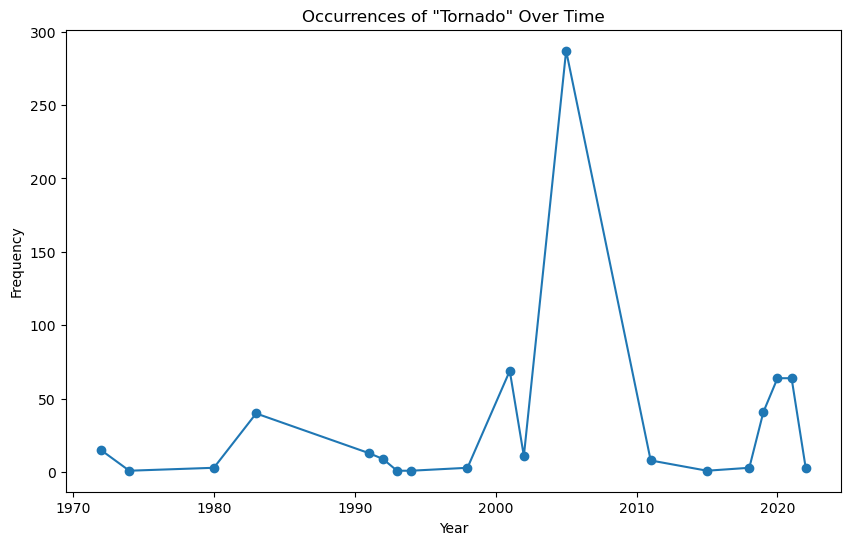

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



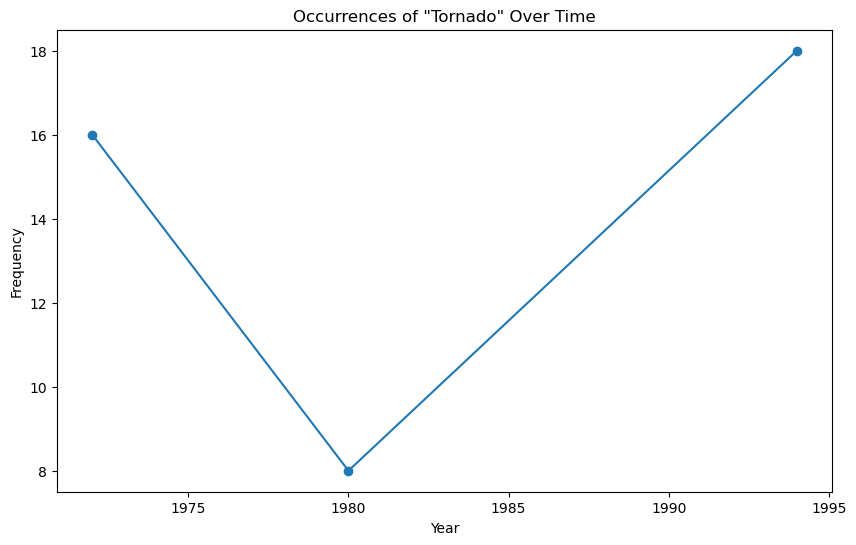

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



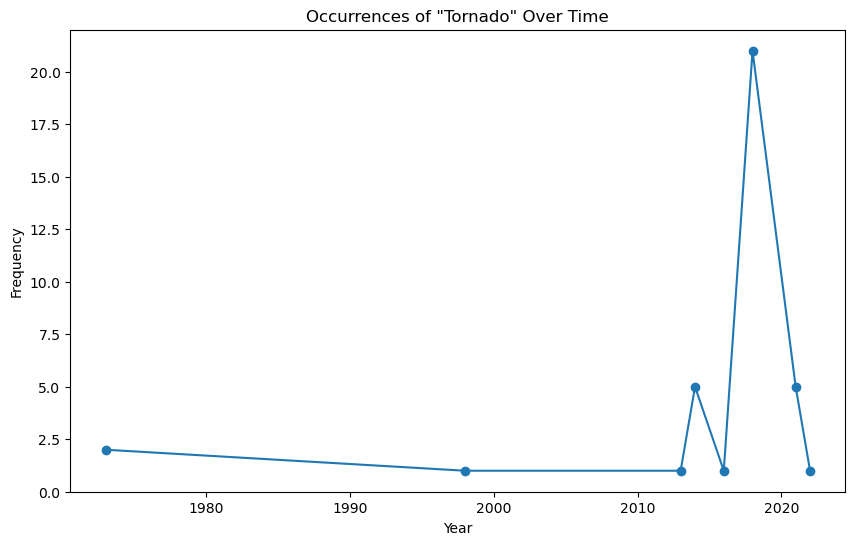

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



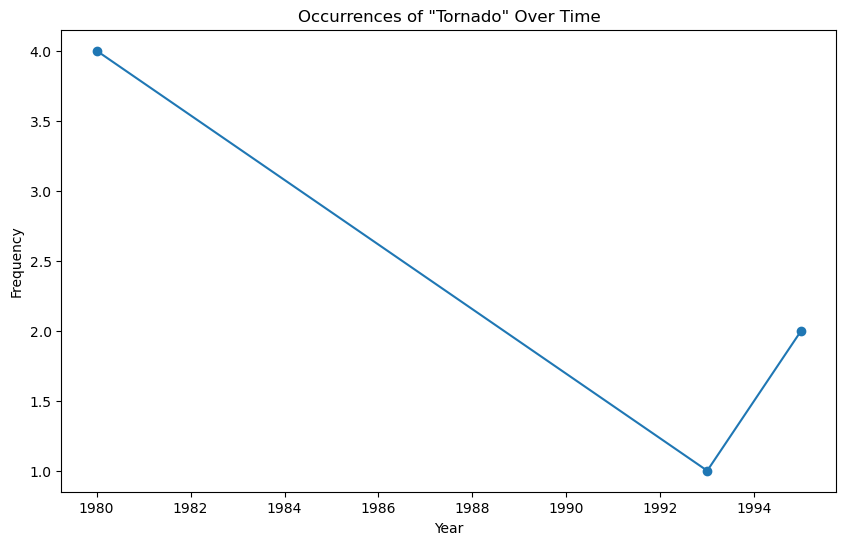

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



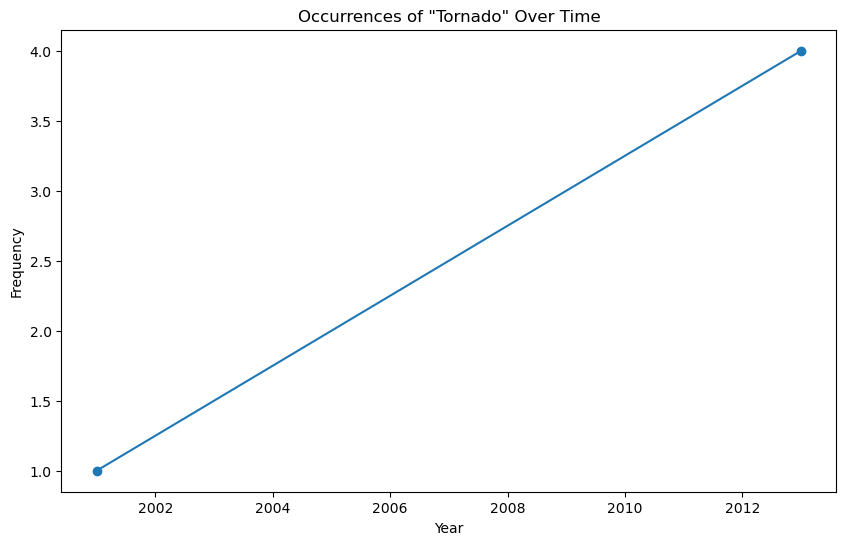

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



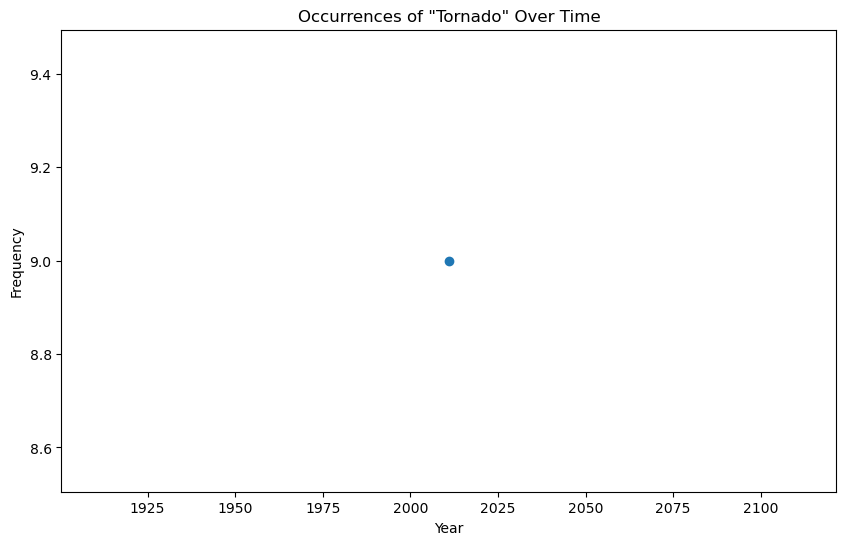

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



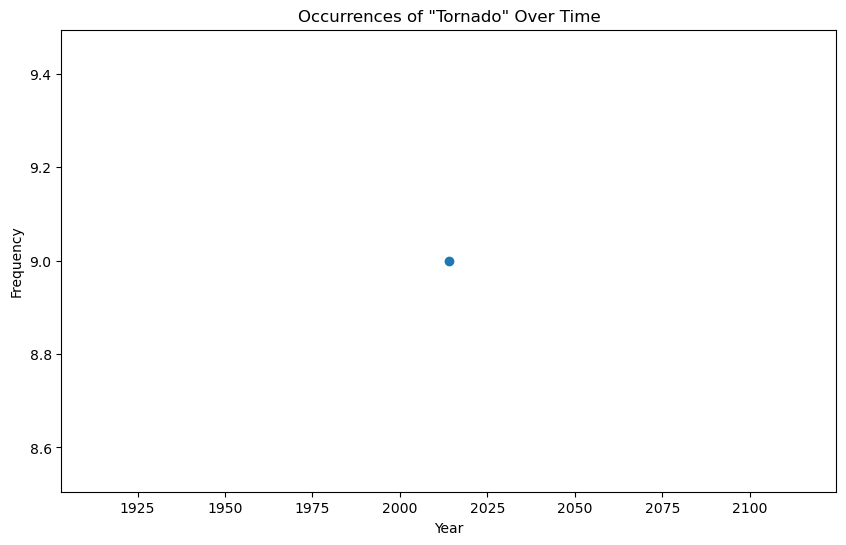

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



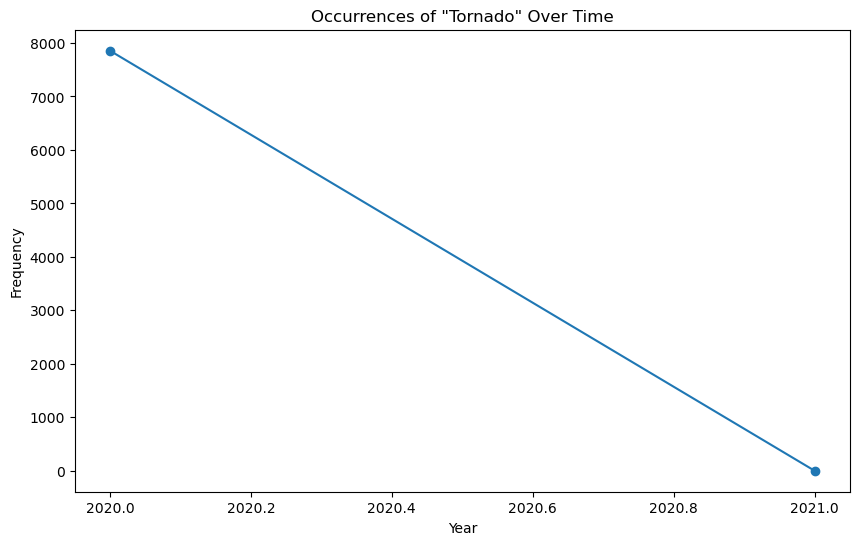

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



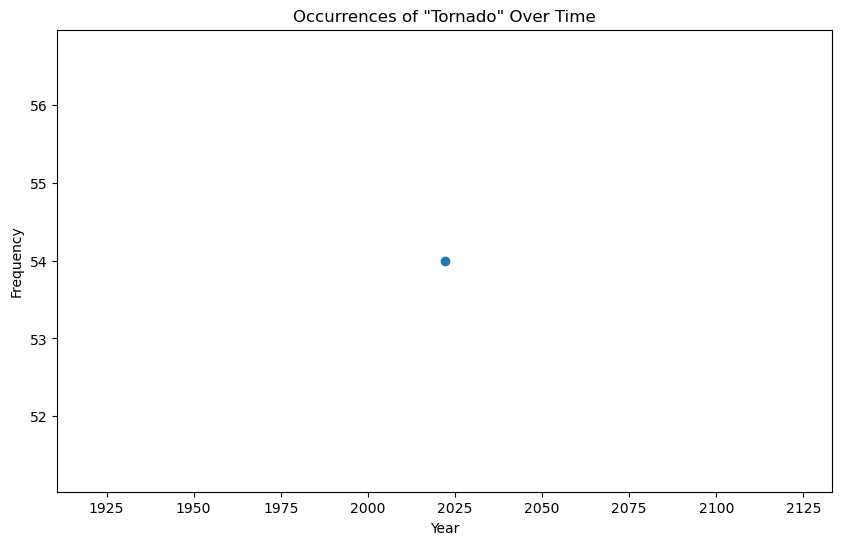

/var/folders/4t/dgzvs_5904lddkdkldcjv8km0000gn/T/ipykernel_1728/2847019591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



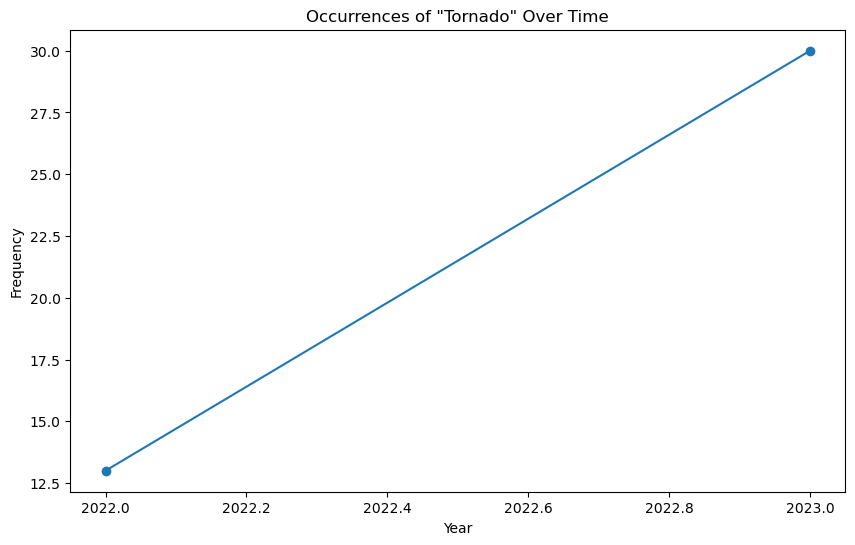

In [77]:
for title in unique_titles:
    specific_disaster = df1[df1['incident_type'] == title]
    specific_disaster['declaration_date'] = pd.to_datetime(specific_disaster['declaration_date'])
    trend = specific_disaster.groupby(specific_disaster['declaration_date'].dt.year).size()

    trend.plot(kind='line', marker='o', figsize=(10, 6), title='Occurrences of "Tornado" Over Time')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

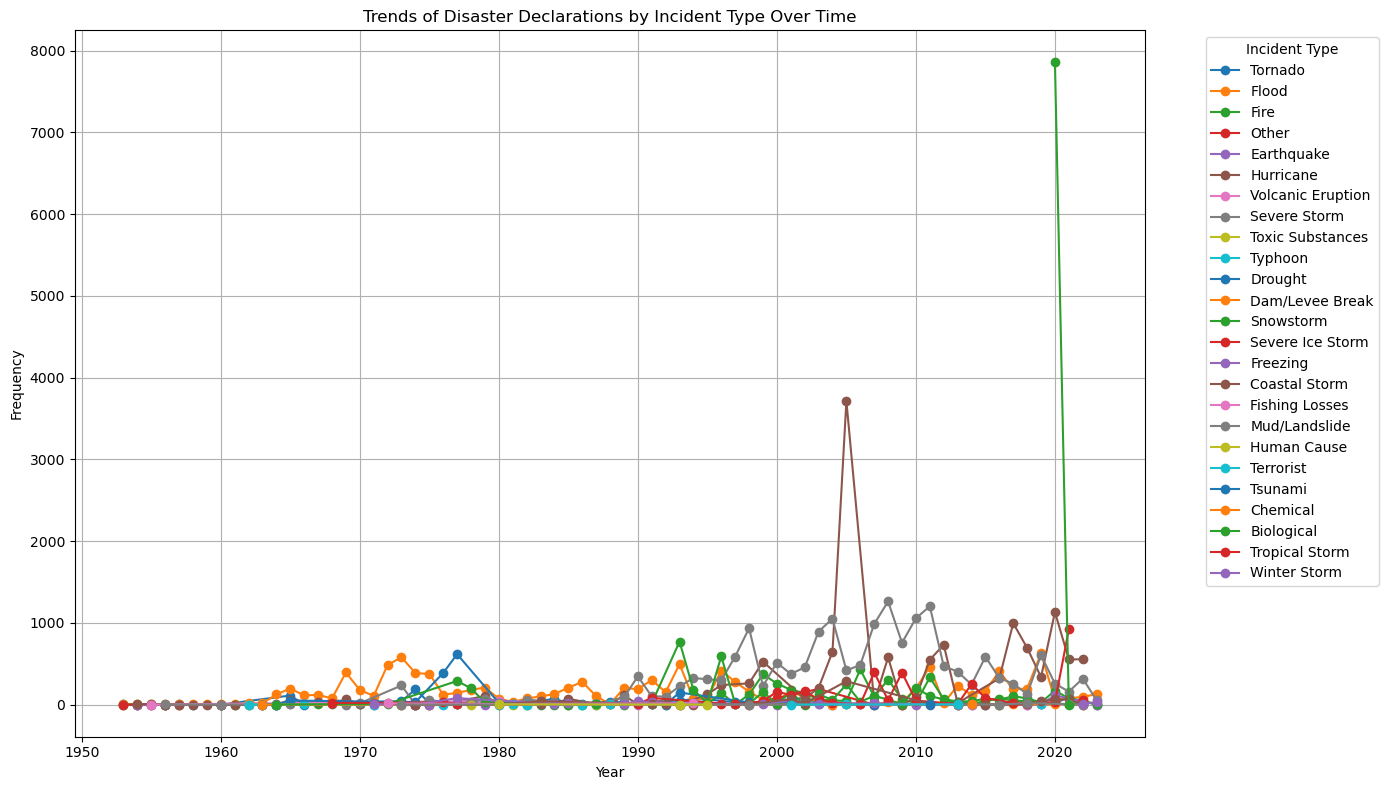

In [78]:
plt.figure(figsize=(14, 8))

# Plot each incident type on the same chart
for title in unique_titles:
    # Filter for a specific disaster title
    specific_disaster = df1[df1['incident_type'] == title]
    
    # Group by year and count occurrences
    trend = specific_disaster.groupby(specific_disaster['declaration_date'].dt.year).size()
    
    # Plot the trend line for each incident type with a label
    plt.plot(trend.index, trend.values, marker='o', label=title)

# Add title, labels, and legend
plt.title('Trends of Disaster Declarations by Incident Type Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

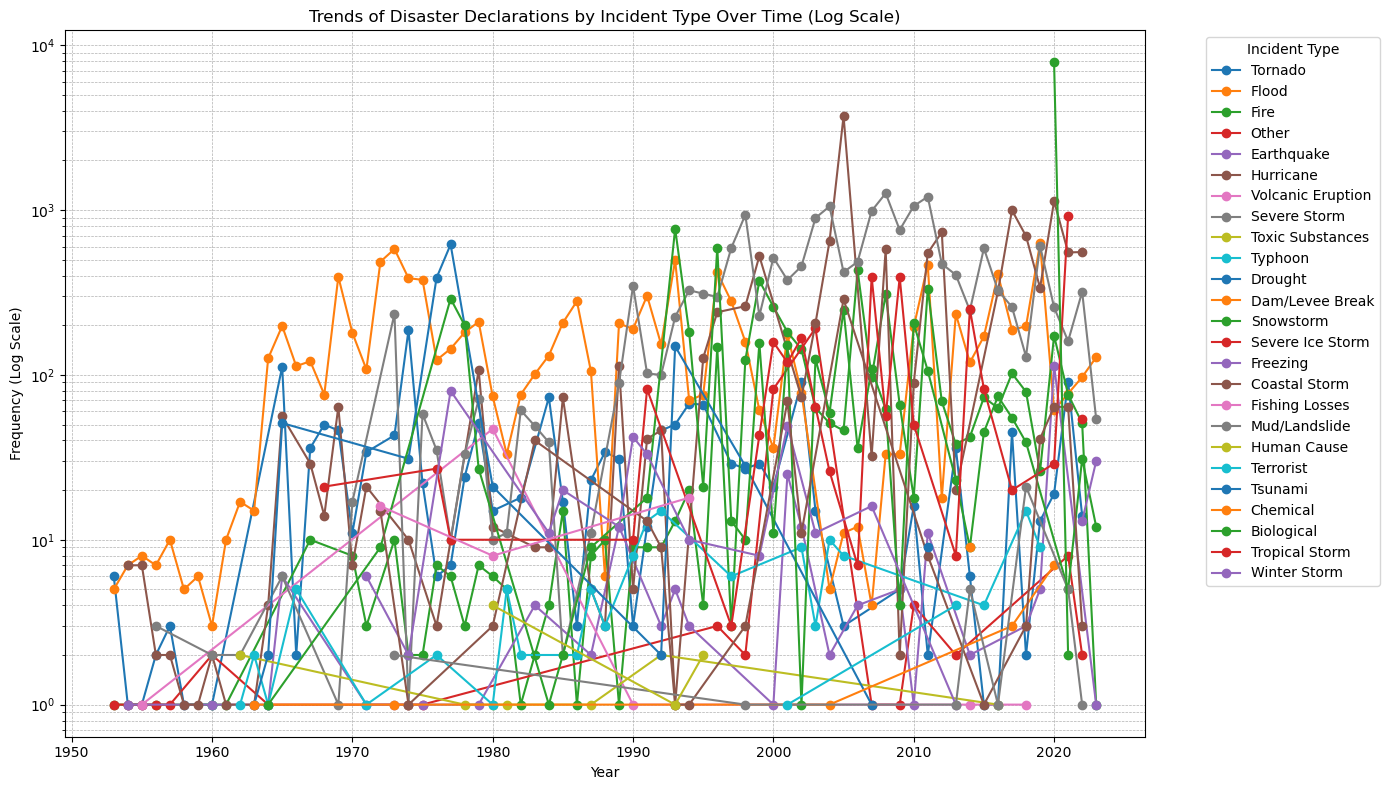

In [79]:
plt.figure(figsize=(14, 8))

# Plot each incident type on the same chart
for title in unique_titles:
    # Filter for a specific disaster title
    specific_disaster = df1[df1['incident_type'] == title]
    
    # Group by year and count occurrences
    trend = specific_disaster.groupby(specific_disaster['declaration_date'].dt.year).size()
    
    # Plot the trend line for each incident type with a label
    plt.plot(trend.index, trend.values, marker='o', label=title)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add title, labels, and legend
plt.title('Trends of Disaster Declarations by Incident Type Over Time (Log Scale)')
plt.xlabel('Year')
plt.ylabel('Frequency (Log Scale)')
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Grid lines for log scale
plt.tight_layout()
plt.show()